In [1081]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [1082]:
## READ DATA ##

data=pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## DATA INSPECTION ##

In [1083]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1084]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1085]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## CLEANING DATA FRAME ##

In [1086]:
## To get lower case values ##
data = data.applymap(lambda s:s.lower() if type(s) == str else s)

In [1087]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1088]:
data = data.replace('select',np.nan)

In [1089]:
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [1090]:
data = data.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Update me on Supply Chain Content','I agree to pay the amount through cheque'], axis=1)

In [1091]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [1092]:
## DROPPING UNWANTED COLUMNS ##

data2 = data.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
data2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [1093]:
round(100*(data2.isnull().sum()/len(data2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## 4 Columns with huge null variables. Not worth dropping as the information is definitely required ##

In [1094]:
data2['Specialization'] = data2['Specialization'].fillna('not provided') 
data2['What matters most to you in choosing a course'] = data2['What matters most to you in choosing a course'].fillna('not provided')
data2['Country'] = data2['Country'].fillna('not provided')
data2['What is your current occupation'] = data2['What is your current occupation'].fillna('not provided')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [1095]:
round(100*(data2.isnull().sum()/len(data2.index)), 2)          ## RECHECK IF ALL VARIABLES ARE UPTO SAISFIABLE VALUES ##

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [1096]:
data2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [1097]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

data2['Country'] = data2.apply(lambda x:slots(x['Country']), axis = 1)
data2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [1098]:
round(100*(data2.isnull().sum()/len(data2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [1099]:
##Loss % if null is removed ##

round(100*(sum(data2.isnull().sum(axis=1) > 1)/data2.shape[0]),2)

1.48

In [1100]:
data3 = data2[data2.isnull().sum(axis=1) <1]

In [1101]:
round(100*(data3.isnull().sum()/len(data3.index)), 2)               ## Re calculation of missing null values ##

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [1102]:
## Dropping Prospect ID as they are not required as they have huge unique values which cannot be of any use ##.

data = data3.drop('Prospect ID',1)
data.shape

(9074, 21)

# EXPLORATORY DATA ANALYSIS ##

Category

In [1103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

As per the above info we find that there are around 17 columns which has Dtype as Object and hence they are confirmed to be categories.

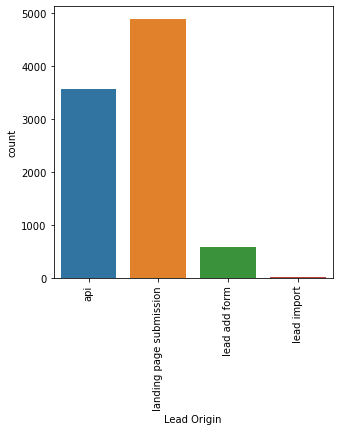

In [1104]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['Lead Origin'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

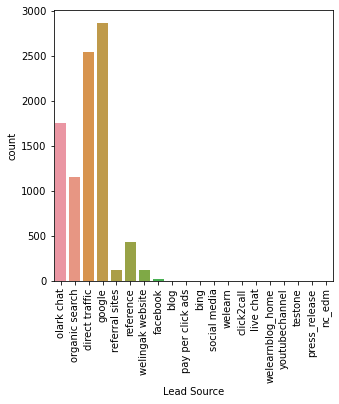

In [1105]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['Lead Source'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

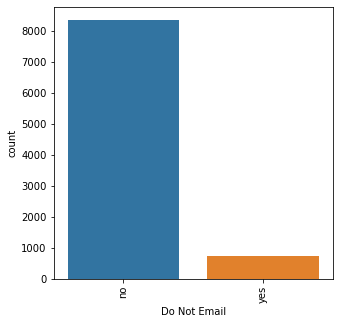

In [1106]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['Do Not Email'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

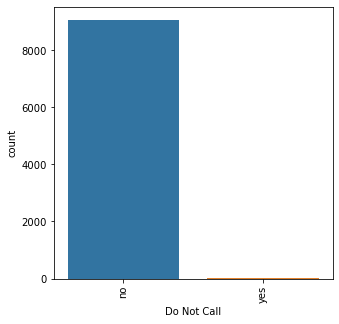

In [1107]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['Do Not Call'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

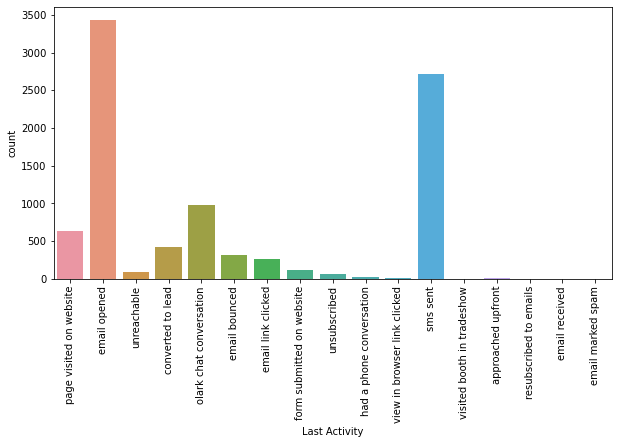

In [1108]:
plt.figure(figsize=(10,5))
s1=sns.countplot(data['Last Activity'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

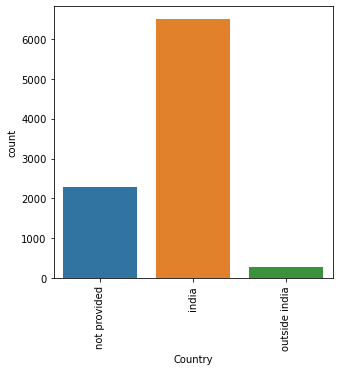

In [1109]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['Country'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

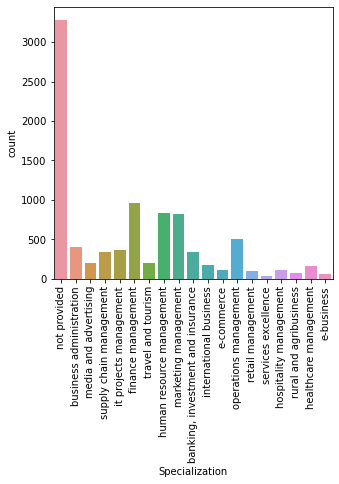

In [1110]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['Specialization'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

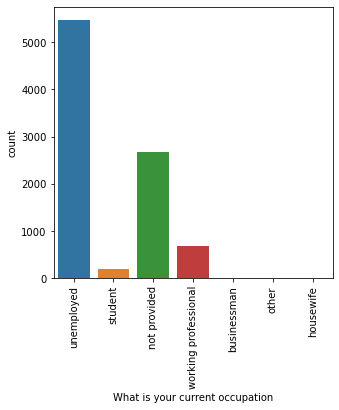

In [1111]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['What is your current occupation'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

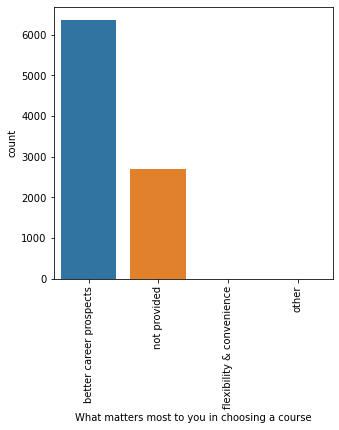

In [1112]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['What matters most to you in choosing a course'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

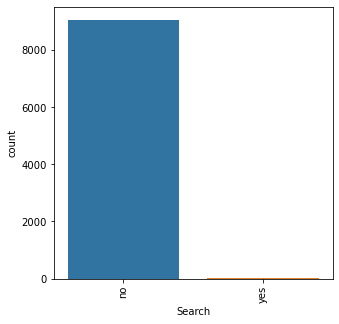

In [1113]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['Search'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

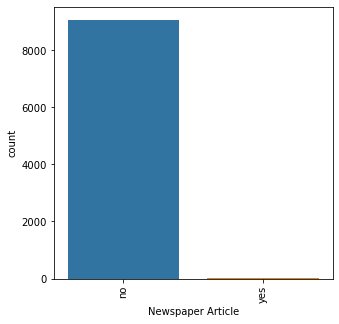

In [1114]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['Newspaper Article'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

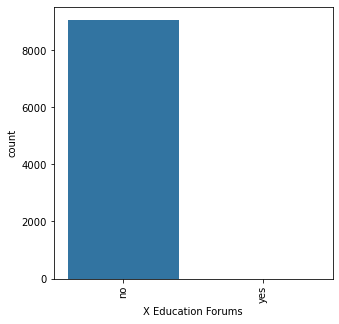

In [1115]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['X Education Forums'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

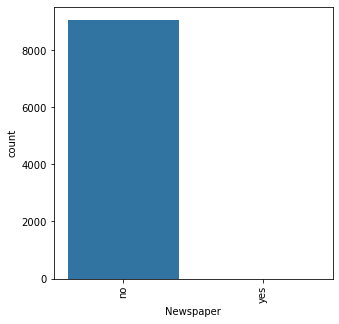

In [1116]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['Newspaper'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

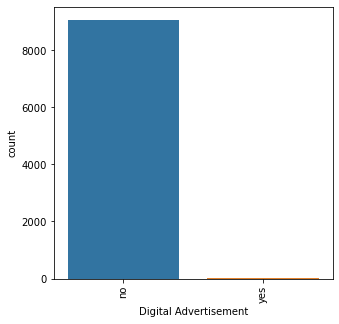

In [1117]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['Digital Advertisement'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

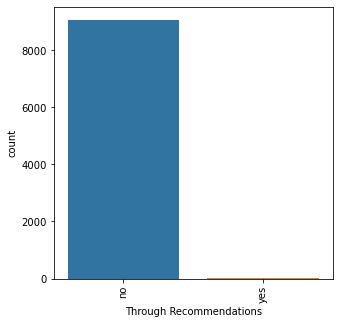

In [1118]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['Through Recommendations'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

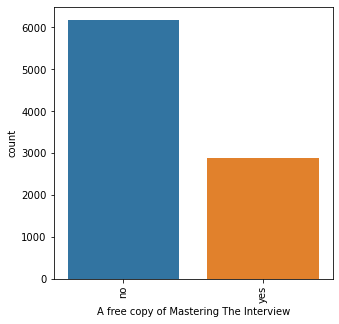

In [1119]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['A free copy of Mastering The Interview'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

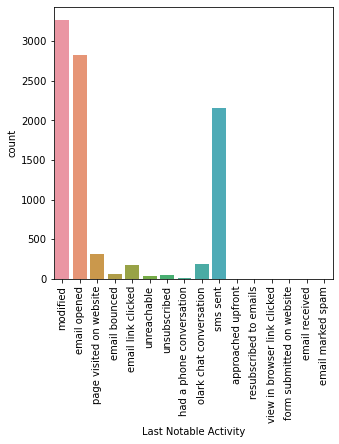

In [1120]:
plt.figure(figsize=(5,5))
s1=sns.countplot(data['Last Notable Activity'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Numerial Values

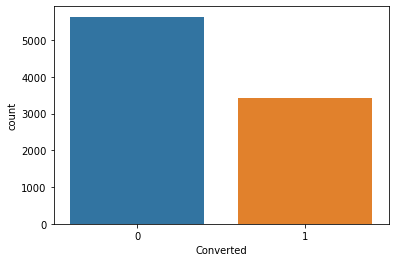

In [1121]:
s1=sns.countplot(data['Converted'])
plt.show()

The above is not exactly the numerical but a boolean to know if the conversion was made or not made

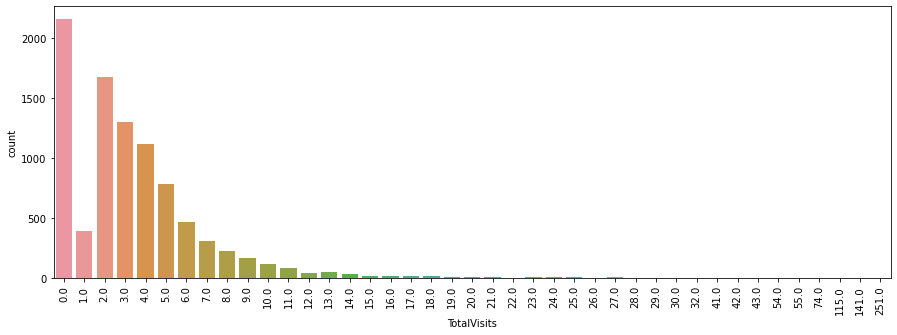

In [1122]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data['TotalVisits'])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Text(0.5, 1.0, 'Total Time Spent on Website')

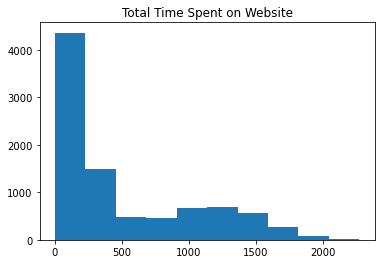

In [1123]:
plt.hist(data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

Text(0.5, 1.0, 'Page Views Per Visit')

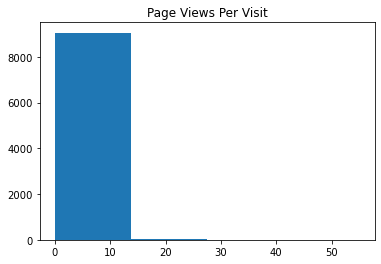

In [1124]:
plt.hist(data['Page Views Per Visit'], bins = 4)
plt.title('Page Views Per Visit')

## Converted or confirmed enrolments ##

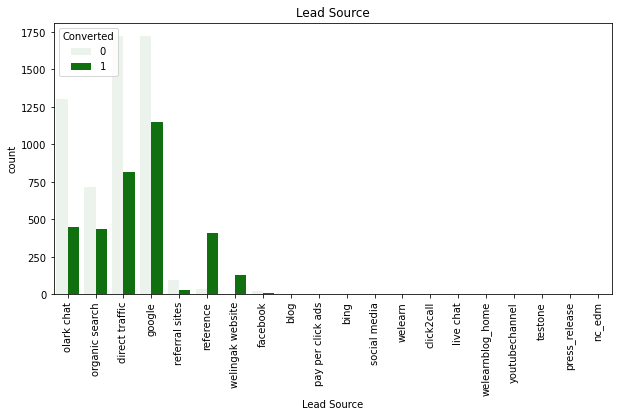

In [1125]:
plt.figure(figsize = (10,5))
sns.countplot(x='Lead Source', hue='Converted', data= data, color = 'green').tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

    Google has the highest conversion. However another point of observation is of reference which is atleast 10 to 15 times greater than to the no conversion on the same category

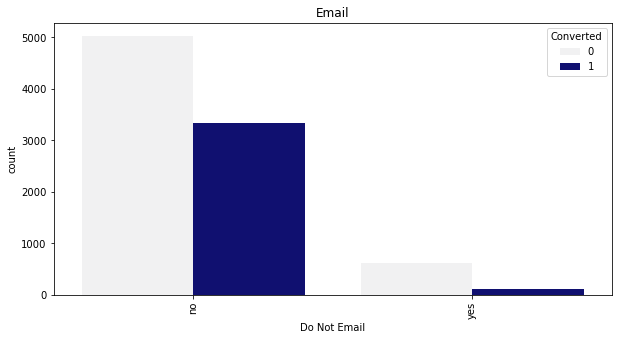

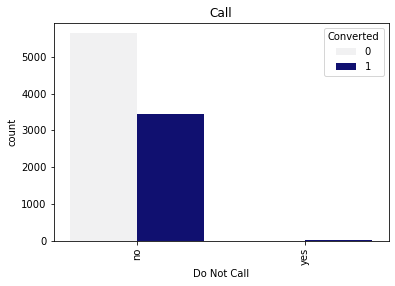

In [1126]:
plt.figure(figsize = (10,5))
sns.countplot(x='Do Not Email', hue='Converted', data= data, color = 'navy').tick_params(axis='x', rotation = 90)
plt.title('Email')
plt.show()

sns.countplot(x='Do Not Call', hue='Converted', data= data, color = 'navy').tick_params(axis='x', rotation = 90)
plt.title('Call')
plt.show()     

Emails and Calls have a very negligible conversions

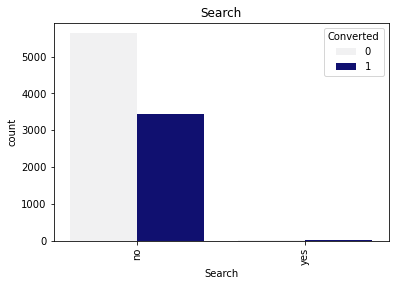

In [1127]:
sns.countplot(x='Search', hue='Converted', data= data, color = 'navy').tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show() 

'Search' as another way to get leads did not get much conversions as the option 'yes' for search has very minute or negligible conversion

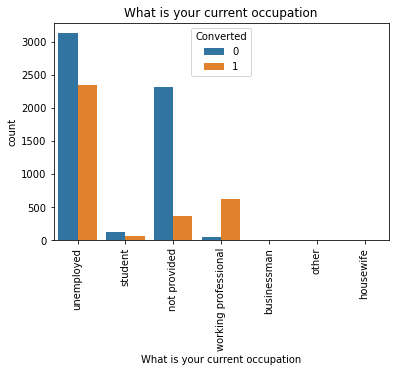

In [1128]:
sns.countplot(x='What is your current occupation', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

'Unemployed' section though has highest conversions, it did take lot of tries to convert sale. However, Working professional section shows it did not require that much of tries as compared to unemployed section and is definitely worth considering working professionals.

Text(0.5, 1.0, 'What matters most to you in choosing a course')

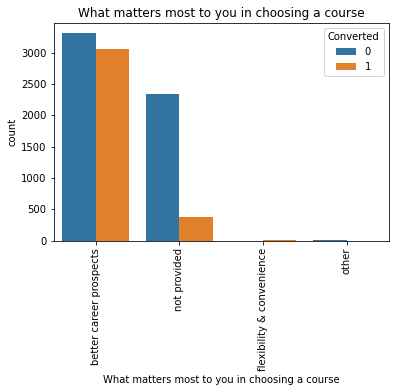

In [1129]:
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

Text(0.5, 1.0, 'What matters most to you in choosing a course')

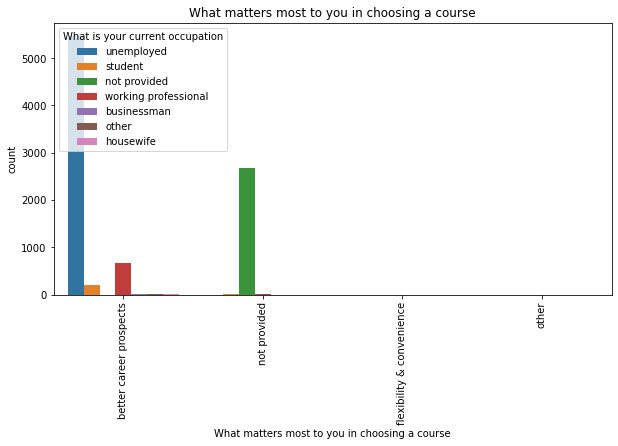

In [1130]:
plt.figure(figsize = (10,5))
sns.countplot(x='What matters most to you in choosing a course' , hue='What is your current occupation', data= data).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

As per the above observation it is the reason for the better career prospects that the people are looking for enrolment and unemployed people who are more in need compated to a working professional.

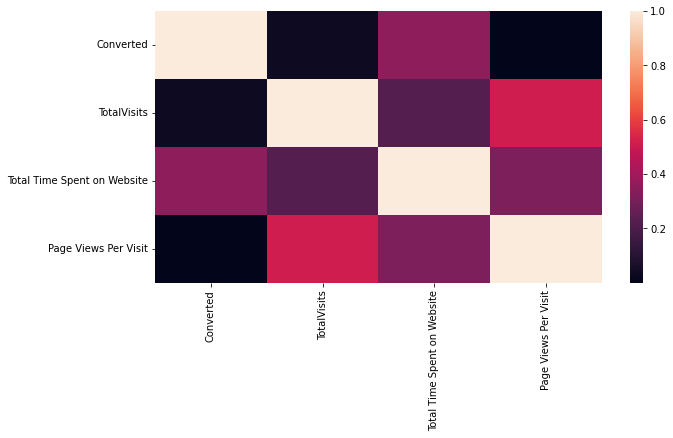

In [1131]:
## How is the correlation among varibles ##
plt.figure(figsize=(10,5))
sns.heatmap(data.corr())
plt.show()

Most of the elements have very less data and due to this it is understood that it is very less relevance to the analysis

In [1132]:
Number_analysis = data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
Number_analysis.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


## DUMMY VAR ##

In [1133]:
data.loc[:, data.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1134]:
dum = pd.get_dummies(data[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [1135]:
dum = pd.concat([data, dummy], axis=1)
dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [1136]:
dum = dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## TEST_TRAIN ##

In [1137]:
from sklearn.model_selection import train_test_split
X = dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1138]:
y = dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1139]:
# 70% and 30% for train and test for Data Split #
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [1140]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## MODEL BUILDING ##

In [1141]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1142]:

from sklearn.feature_selection import RFE

In [1163]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [1164]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_landing page submission', False, 24),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 39),
 ('Specialization_business administration', False, 31),
 ('Specialization_e-business', False, 30),
 ('Specialization_e-commerce', False, 21),
 ('Specialization_finance management', False, 28),
 ('Specialization_healthcare management', False, 23),
 ('Specialization_hospitality management', False, 43),
 ('Specialization_human resource management', False, 29),
 ('Specialization_international business', False, 35),
 ('Specialization_it projects management', False, 26),
 ('Specialization_marketing management', False, 20),
 ('Specialization_media and advertising', False, 37),
 ('Specialization_operations management', False, 25),
 ('Specialization_retail management', False, 61),
 ('Specialization_rural and agribusiness', False, 22),
 ('Specialization_serv

In [1165]:
## RFE Selected colums to be put in the variable ##

rfe_clm = X_train.columns[rfe.support_]

In [1166]:
import statsmodels.api as sm

In [1167]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           73
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.2
Date:                Sun, 23 Oct 2022   Deviance:                       5068.3
Time:                        18:57:49   Pearson chi2:                 6.47e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.3606   7.27e+04      0.000      1.000   -1.42e+05    1.42e+05
TotalVisits                                              8.8302      2.025      4.360      0.000       4.861      12.800
Total Time Spent on Website                              4.6367      0.173     26.855      0.000       4.298       4.975
Page Views Per Visit                                    -2.3596      0.630     -3.744      0.000      -3.595      -1.124
Lead Origin_landing page submission                     -0.5076      0.132     -3.855      0.000      -0.766      -0.249
Lead Origin_lead add form                               -0.8107      1.532     -0.529      0.597      -3.814       2.193
Lead Origin_lead import                                 24.0916   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Specialization_business administration                   0.4900      0.195      2.513      0.012       0.108       0.872
Specialization_e-business                                0.6175      0.457      1.352      0.176      -0.277       1.512
Specialization_e-commerce                                0.8074      0.326      2.474      0.013       0.168       1.447
Specialization_finance management                        0.5478      0.148      3.700      0.000       0.258       0.838
Specialization_healthcare management                     0.6611      0.280      2.359      0.018       0.112       1.210
Specialization_hospitality management                   -0.2332      0.330     -0.708      0.479      -0.879       0.413
Specialization_human resource management                 0.5210      0.152      3.422      0.001       0.223       0.819
Specialization_international business                    0.4244      0.269      1.580      0.114      -0.102       0.951
Specialization_it projects management                    0.6011      0.205      2.934      0.003       0.200       1.003
Specialization_marketing management                      0.7245      0.150      4.836      0.000       0.431       1.018
Specialization_media and advertising                     0.3464      0.253      1.368      0.171      -0.150       0.843
Specialization_operations management                     0.6170      0.180      3.424      0.001       0.264       0.970
Specialization_retail management                         0.0384      0.350      0.110      0.913      -0.647       0.724
Specialization_rural and agribusiness                    0.7387      0.426      1.734      0.083      -0.096       1.573
Specialization_services excellence                       0.9127      0.558      1.636      0.102      -0.181       2.006
Specialization_supply chain management                   0

In [1168]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1169]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
53,Last Activity_resubscribed to emails,inf
73,Last Notable Activity_resubscribed to emails,inf
46,Last Activity_email marked spam,inf
66,Last Notable Activity_email marked spam,inf
47,Last Activity_email opened,565.29
...,...,...
7,Specialization_e-business,1.06
59,What is your current occupation_other,1.02
29,Lead Source_nc_edm,NaN
32,Lead Source_pay per click ads,NaN


In [1172]:
X_train.drop('Last Notable Activity_view in browser link clicked', axis = 1, inplace = True)

In [1173]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           73
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.2
Date:                Sun, 23 Oct 2022   Deviance:                       5068.3
Time:                        19:01:28   Pearson chi2:                 6.47e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.3602   7.27e+04      0.000      1.000   -1.42e+05    1.42e+05
TotalVisits                                              8.8302      2.025      4.360      0.000       4.861      12.800
Total Time Spent on Website                              4.6367      0.173     26.855      0.000       4.298       4.975
Page Views Per Visit                                    -2.3596      0.630     -3.744      0.000      -3.595      -1.124
Lead Origin_landing page submission                     -0.5076      0.132     -3.855      0.000      -0.766      -0.249
Lead Origin_lead add form                               -0.8107      1.532     -0.529      0.597      -3.814       2.193
Lead Origin_lead import                                 24.0916   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Specialization_business administration                   0.4900      0.195      2.513      0.012       0.108       0.872
Specialization_e-business                                0.6175      0.457      1.352      0.176      -0.277       1.512
Specialization_e-commerce                                0.8074      0.326      2.474      0.013       0.168       1.447
Specialization_finance management                        0.5478      0.148      3.700      0.000       0.258       0.838
Specialization_healthcare management                     0.6611      0.280      2.359      0.018       0.112       1.210
Specialization_hospitality management                   -0.2332      0.330     -0.708      0.479      -0.879       0.413
Specialization_human resource management                 0.5210      0.152      3.422      0.001       0.223       0.819
Specialization_international business                    0.4244      0.269      1.580      0.114      -0.102       0.951
Specialization_it projects management                    0.6011      0.205      2.934      0.003       0.200       1.003
Specialization_marketing management                      0.7245      0.150      4.836      0.000       0.431       1.018
Specialization_media and advertising                     0.3464      0.253      1.368      0.171      -0.150       0.843
Specialization_operations management                     0.6170      0.180      3.424      0.001       0.264       0.970
Specialization_retail management                         0.0384      0.350      0.110      0.913      -0.647       0.724
Specialization_rural and agribusiness                    0.7387      0.426      1.734      0.083      -0.096       1.573
Specialization_services excellence                       0.9127      0.558      1.636      0.102      -0.181       2.006
Specialization_supply chain management                   0

In [1174]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
53,Last Activity_resubscribed to emails,inf
73,Last Notable Activity_resubscribed to emails,inf
46,Last Activity_email marked spam,inf
66,Last Notable Activity_email marked spam,inf
47,Last Activity_email opened,565.29
...,...,...
20,Specialization_services excellence,1.06
7,Specialization_e-business,1.06
59,What is your current occupation_other,1.02
29,Lead Source_nc_edm,NaN


In [1176]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           73
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.2
Date:                Sun, 23 Oct 2022   Deviance:                       5068.3
Time:                        19:02:04   Pearson chi2:                 6.47e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.3602   7.27e+04      0.000      1.000   -1.42e+05    1.42e+05
TotalVisits                                              8.8302      2.025      4.360      0.000       4.861      12.800
Total Time Spent on Website                              4.6367      0.173     26.855      0.000       4.298       4.975
Page Views Per Visit                                    -2.3596      0.630     -3.744      0.000      -3.595      -1.124
Lead Origin_landing page submission                     -0.5076      0.132     -3.855      0.000      -0.766      -0.249
Lead Origin_lead add form                               -0.8107      1.532     -0.529      0.597      -3.814       2.193
Lead Origin_lead import                                 24.0916   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Specialization_business administration                   0.4900      0.195      2.513      0.012       0.108       0.872
Specialization_e-business                                0.6175      0.457      1.352      0.176      -0.277       1.512
Specialization_e-commerce                                0.8074      0.326      2.474      0.013       0.168       1.447
Specialization_finance management                        0.5478      0.148      3.700      0.000       0.258       0.838
Specialization_healthcare management                     0.6611      0.280      2.359      0.018       0.112       1.210
Specialization_hospitality management                   -0.2332      0.330     -0.708      0.479      -0.879       0.413
Specialization_human resource management                 0.5210      0.152      3.422      0.001       0.223       0.819
Specialization_international business                    0.4244      0.269      1.580      0.114      -0.102       0.951
Specialization_it projects management                    0.6011      0.205      2.934      0.003       0.200       1.003
Specialization_marketing management                      0.7245      0.150      4.836      0.000       0.431       1.018
Specialization_media and advertising                     0.3464      0.253      1.368      0.171      -0.150       0.843
Specialization_operations management                     0.6170      0.180      3.424      0.001       0.264       0.970
Specialization_retail management                         0.0384      0.350      0.110      0.913      -0.647       0.724
Specialization_rural and agribusiness                    0.7387      0.426      1.734      0.083      -0.096       1.573
Specialization_services excellence                       0.9127      0.558      1.636      0.102      -0.181       2.006
Specialization_supply chain management                   0

In [1177]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
53,Last Activity_resubscribed to emails,inf
73,Last Notable Activity_resubscribed to emails,inf
46,Last Activity_email marked spam,inf
66,Last Notable Activity_email marked spam,inf
47,Last Activity_email opened,565.29
...,...,...
20,Specialization_services excellence,1.06
7,Specialization_e-business,1.06
59,What is your current occupation_other,1.02
29,Lead Source_nc_edm,NaN


In [1178]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [1179]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           72
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.8
Date:                Sun, 23 Oct 2022   Deviance:                       5075.7
Time:                        19:03:00   Pearson chi2:                 6.52e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.3753   7.27e+04      0.000      1.000   -1.43e+05    1.43e+05
TotalVisits                                              9.1304      2.025      4.508      0.000       5.161      13.100
Total Time Spent on Website                              4.6458      0.173     26.914      0.000       4.307       4.984
Page Views Per Visit                                    -2.3689      0.630     -3.762      0.000      -3.603      -1.135
Lead Origin_landing page submission                     -0.5179      0.131     -3.939      0.000      -0.776      -0.260
Lead Origin_lead add form                               -0.8316      1.532     -0.543      0.587      -3.835       2.172
Lead Origin_lead import                                 24.0811   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Specialization_business administration                   0.5191      0.194      2.674      0.007       0.139       0.900
Specialization_e-business                                0.6231      0.457      1.364      0.173      -0.272       1.519
Specialization_e-commerce                                0.8143      0.326      2.496      0.013       0.175       1.454
Specialization_finance management                        0.5609      0.148      3.792      0.000       0.271       0.851
Specialization_healthcare management                     0.6668      0.280      2.380      0.017       0.118       1.216
Specialization_hospitality management                   -0.2251      0.329     -0.683      0.494      -0.871       0.421
Specialization_human resource management                 0.5314      0.152      3.492      0.000       0.233       0.830
Specialization_international business                    0.4336      0.268      1.615      0.106      -0.093       0.960
Specialization_it projects management                    0.6102      0.205      2.980      0.003       0.209       1.012
Specialization_marketing management                      0.7534      0.150      5.039      0.000       0.460       1.046
Specialization_media and advertising                     0.3947      0.251      1.574      0.115      -0.097       0.886
Specialization_operations management                     0.6254      0.180      3.472      0.001       0.272       0.978
Specialization_retail management                         0.0468      0.350      0.134      0.893      -0.638       0.732
Specialization_rural and agribusiness                    0.7457      0.426      1.750      0.080      -0.089       1.581
Specialization_services excellence                       0.9211      0.557      1.653      0.098      -0.171       2.013
Specialization_supply chain management                   0

In [1180]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
53,Last Activity_resubscribed to emails,inf
72,Last Notable Activity_resubscribed to emails,inf
46,Last Activity_email marked spam,inf
65,Last Notable Activity_email marked spam,inf
47,Last Activity_email opened,565.28
...,...,...
19,Specialization_rural and agribusiness,1.08
20,Specialization_services excellence,1.06
7,Specialization_e-business,1.06
29,Lead Source_nc_edm,NaN


## Prediction ##

In [1181]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.732503
3604    0.088218
5584    0.311680
7679    0.094828
7563    0.154837
7978    0.917870
7780    0.202226
7863    0.985156
838     0.622134
708     0.250629
dtype: float64

In [1182]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73250253, 0.08821785, 0.31168049, 0.09482765, 0.15483726,
       0.91787026, 0.20222621, 0.98515599, 0.62213354, 0.25062917])

In [1183]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.732503
1,0,0.088218
2,0,0.311680
3,0,0.094828
4,0,0.154837


## MODEL EVALUATION ##

In [1185]:
from sklearn import metrics

In [1186]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3456,  439],
       [ 695, 1761]], dtype=int64)

In [1187]:
## ACCURACY ##
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8214454416627303

In [1188]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

In [1189]:
## Sensitivity Calculation ##
TP/(TP+FN)

0.7170195439739414

In [1190]:
## SPECIFITY ##
TN/(TN+FP)

0.8872913992297817

# ACCURACY = 82%
SENSITIVTY = 71%
SPECIFITY = 88%

## ROC CURVE ##

In [1192]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1193]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

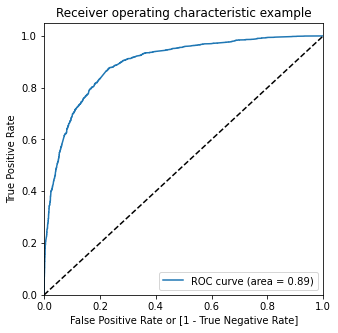

In [1194]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

ROC of 0.89

In [1195]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.732503,1,1,1,1,1,1,1,1,1,0,0
1,0,0.088218,0,1,0,0,0,0,0,0,0,0,0
2,0,0.311680,0,1,1,1,1,0,0,0,0,0,0
3,0,0.094828,0,1,0,0,0,0,0,0,0,0,0
4,0,0.154837,0,1,1,0,0,0,0,0,0,0,0


In [1196]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.640529,0.967834,0.434146
0.2,0.2,0.767911,0.921010,0.671374
0.3,0.3,0.808534,0.877443,0.765083
0.4,0.4,0.820028,0.792752,0.837227
0.5,0.5,0.821445,0.717020,0.887291
0.6,0.6,0.811211,0.644137,0.916560
0.7,0.7,0.786648,0.531352,0.947625
0.8,0.8,0.758306,0.424267,0.968935
0.9,0.9,0.715950,0.288681,0.985366


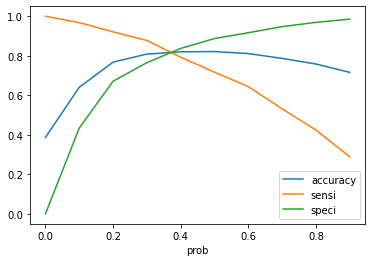

In [1197]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## CUTOFF OF APPROXIMATE 0.36 ##

In [1198]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.732503,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.088218,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.311680,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.094828,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.154837,0,1,1,0,0,0,0,0,0,0,0,0


In [1199]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8143599433160132

In [1200]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3147,  748],
       [ 431, 2025]], dtype=int64)

In [1201]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [1202]:
## SENSITIVITY ##
TP/(TP+FN)

0.8245114006514658

In [1203]:
##SPECIFICITY##
TN/(TN+FP)

0.8079589216944801

## TEST SET PREDICTIONS ##

In [1204]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [1209]:
CLM = X_train.columns

In [1210]:
# Select the columns in X_train for X_test as well
X_test = X_test[CLM]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[CLM])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
8308,1.0,0.035461,0.416813,0.208333,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,0.166667,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2085,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4048,1.0,0.028369,0.617077,0.083333,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4790,1.0,0.028369,0.005282,0.083333,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8179,1.0,0.170213,0.148768,0.333333,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6236,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5240,1.0,0.078014,0.458627,0.229167,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1211]:
y_test_pred = res.predict(X_test_sm)    ## variable storing ##
y_pred_df = pd.DataFrame(y_test_pred)   ## Conversion to dataframe ##
y_test_df = pd.DataFrame(y_test)        ## y_test conversion to dataframe##
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)   ## Changing y_test_df and y_pred_df
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'}) ## Column Rename
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.241032
1,1,0.842654
2,1,0.985156
3,1,0.886723
4,0,0.156272


In [1212]:
## FINALE PREDICTION ##

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.241032,0
1,1,0.842654,1
2,1,0.985156,1
3,1,0.886723,1
4,0,0.156272,0
...,...,...,...
2718,1,0.150158,0
2719,0,0.266695,0
2720,0,0.155270,0
2721,1,0.858522,1


In [1213]:
## ACURACY ##
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8097686375321337

In [1214]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1401,  343],
       [ 175,  804]], dtype=int64)

In [1215]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [1218]:
## SENSITIVITY ##

TP/(TP+FN)

0.8212461695607763

In [1219]:
## SPECIFITY ##

TN/(TN+FP)

0.8033256880733946

With Cutoff of 0.36 we get an acciracy of 80%

## PRECISION & RECALL ##

In [1220]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3456,  439],
       [ 695, 1761]], dtype=int64)

In [1223]:
## Precision ##
confusion[1,1]/(confusion[0,1]+confusion[1,1])

## TP        / TP             + FP         ##

0.8004545454545454

In [1224]:
## Recall ##
confusion[1,1]/(confusion[1,0]+confusion[1,1])

## TP         /  TP           +  FN         ##

0.7170195439739414

Overall the precision is of 80% along with the Recall of almost 72%

## TRADE OFF (PRECISION AND RECALL)

In [1225]:
from sklearn.metrics import precision_recall_curve

In [1226]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [1227]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

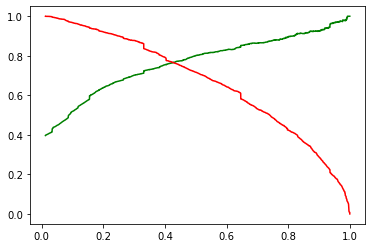

In [1228]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

CUTOFF 0.42 approximately

In [1229]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.732503,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.088218,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.311680,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.094828,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.154837,0,1,1,0,0,0,0,0,0,0,0,0


In [1231]:
## ACCURACY ##
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8182963312864115

In [1232]:
## CONFUSIOIN MATRIX ##
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3294,  601],
       [ 553, 1903]], dtype=int64)

In [1233]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [1234]:
## PRECISION ##
TP / (TP + FP)

0.7599840255591054

In [1235]:
## RECALL ##
TP / (TP + FN)

0.7748371335504886

PRECISION = 75%
RECALL = 77%
CUTOFF = 0.42 (approx)

## TEST SET PREDICTION ##

In [1236]:
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.241032
1,1,0.842654
2,1,0.985156
3,1,0.886723
4,0,0.156272


In [1237]:
# Making prediction with cut off using at 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.241032,0
1,1,0.842654,1
2,1,0.985156,1
3,1,0.886723,1
4,0,0.156272,0
...,...,...,...
2718,1,0.150158,0
2719,0,0.266695,0
2720,0,0.155270,0
2721,1,0.858522,1


In [1240]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)
print('Accuracy', metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted))

Accuracy 0.8207858979067205


In [1241]:
## CONFUSE MATRIX ##
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1481,  263],
       [ 225,  754]], dtype=int64)

In [1242]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [1245]:
TP / (TP + FP)
print ('PRECISION IS', TP / (TP + FP))

PRECISION IS 0.7413962635201573


In [1244]:
TP / (TP + FN)
print ('RECALL IS', TP / (TP + FN))

RECALL IS 0.7701736465781409


<font color= blue>___ So, overall with 0.42 cut off we have a precision of 74% and Recall of 77%___</font>

## Observations ##

1. With various variables, the most conversions were from the Internet sources.
        i. Google
        ii.Direct Traffic
        iii.Search
        iv.Website
        
2. Also depended on the Total time spend on website
3. Visits (Website visits)
4. And if the person is employed anbd for the better career aspirations
5. Unemployed people for better career aspirations